<a href="https://colab.research.google.com/github/jungmin0710/DataAnalysisBasic/blob/main/subwaytime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline  
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False#마이너스 기호 나오게

#plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
#출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?

In [ ]:
f = open('subwaytime.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
for row in data:
  row[4:] = map(int, row[4:])
  if sum(row[10:15:2]) > mx:
    mx = sum(row[10:15:2])
    mx_station = row[3] + '(' + row[1] + ')'
print("출근시간 사람들이 가장 많이 타는 역 : ", mx_station, mx)

출근시간 사람들이 가장 많이 타는 역 :  신림(2호선) 809541


In [ ]:
f = open('subwaytime.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
for row in data:
  row[4:] = map(int, row[4:])
  a = row[11:16:2]
  if sum(a) > mx:
    mx = sum(a)
    mx_station = row[3] + '(' + row[1] + ')'
print("출근시간 사람들이 가장 많이 내리는 역 : ", mx_station, mx)

출근시간 사람들이 가장 많이 내리는 역 :  강남(2호선) 984427


In [ ]:
#밤 11시에 사람들이 가장 많이 타는 역은 어디일까?

In [ ]:
f = open('subwaytime.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
t = int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : '))

for row in data:
  row[4:] = map(int, row[4:])
  a = row[4+(t-4)*2]
  if a > mx:
    mx = a
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : 23
강남(2호선) 145504


In [ ]:
#밤 11시에 사람들이 가장 많이 내리는 역은 어디일까?

In [ ]:
f = open('subwaytime.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
t = int(input('몇 시의 하차 인원이 가장 많은 역이 궁금하세요? : '))

for row in data:
  row[5:] = map(int, row[5:])
  a = row[5+(t-4)*2]
  if a > mx:
    mx = a
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

몇 시의 하차 인원이 가장 많은 역이 궁금하세요? : 23
신림(2호선) 109651


In [ ]:
#시간대별로 하차 인원이 가장 많은 역을 찾으려면?

In [ ]:
f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
next(data)
next(data)
mx = [0]*24
mx_station = [''] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    b = row[5 + j * 2]
    if b > mx[j]:
      mx[j] = b
      mx_station[j] = row[3] + '(' + str(j+4) + ')'

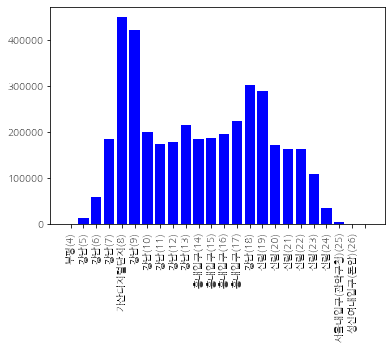

In [ ]:
plt.rc('font', family=font_name)
plt.bar(range(24),mx,color='b')
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

In [ ]:
#지하철 시간대별 승하차 인원 추이

In [ ]:
f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data:
  row[4:] = map(int, row[4:])
  for i in range(24):
    s_in[i] += row[4+i*2]
    s_out[i] += row[5+i*2]

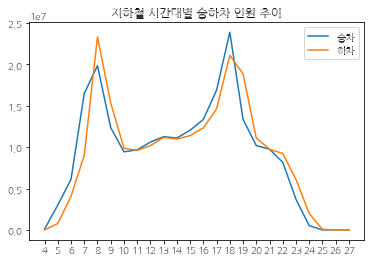

In [ ]:
plt.rc('font', family=font_name)
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()

In [49]:
#퀴즈 : 어느 지역 클럽이 가장 붐볐을지 상위 5개역의 이름을 뽑아보라.(자료는 현재 자료로 그대로 사용)
f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
next(data)
next(data)
time = [20,21,22,23,24] #클럽 이용 시간대는 저녁이므로 20~24시 사이의 하차시간을 기준으로 잡음
Station_dict = {} #딕셔너리 형태로 저장
Station_Population = 0 #하차인구의 총 합

for row in data:
  row[5:] = map(int, row[5:])
  for i in time: #해당 시간대의 데이터를
    a = row[5+(i-4)*2] #하차인구만 뽑아서
    Station_Population += a #총 하차인구에 저장
  Station_dict[row[3]] = Station_Population #딕셔너리에 역이름: 총하차인구 형태로 저장
  Station_Population = 0 #하차인구의 총 합을 초기화

Sorted_dict = sorted(Station_dict.items(), reverse=True, key=lambda item: item[1]) #값을 기준으로 내림차순 정렬하기


#상위 5개역 출력
n = 1
print("상위 5개 역은 다음과 같습니다.")
for key, value in Sorted_dict: 
  print(n,"위 : ", key, "역(", value,"명)")
  n += 1
  if n > 5: break




상위 5개 역은 다음과 같습니다.
1 위 :  신림 역( 643661 명)
2 위 :  서울대입구(관악구청) 역( 412158 명)
3 위 :  구로디지털단지 역( 408610 명)
4 위 :  수유(강북구청) 역( 299689 명)
5 위 :  강남 역( 286610 명)
